In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

## 1. Load and Explore Data

In [81]:
df = pd.read_csv('data/2024_LoL_esports_match_data_from_OraclesElixir1.csv', sep=';')

print(f"Shape: {df.shape}")
print(f"\nAvailable columns: {len(df.columns)}")
df.head()

Shape: (12276, 123)

Available columns: 123


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,1,Blue,top,Zika,oe:player:65ed20b21e2993fb00dbd21a2fd991b,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Aatrox,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,1,3,1,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092,225.6204,0.169648,564.1463,NaN,14,0.4454,4,0.1273,5,24,0.7635,11083,6960,221.4210,0.237608,10784,NaN,279.0,256.0,23,16.0,0.0,8.8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,2,Blue,jng,Weiwei,oe:player:57da8dfcfbdb4e5b019fe93003db1c4,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Maokai,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,4,3,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7361,234.1782,0.176101,847.4761,NaN,10,0.3181,12,0.3818,10,39,1.2407,8636,4513,143.5737,0.154069,8840,NaN,153.0,14.0,139,111.0,3.0,4.8674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,3,Blue,mid,Scout,oe:player:71e79ef80600d398d90cfebe3b0b758,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Orianna,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,0,2,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10005,318.2927,0.239355,432.2163,NaN,4,0.1273,8,0.2545,2,31,0.9862,10743,6620,210.6045,0.226000,10594,NaN,270.0,269.0,1,1.0,0.0,8.5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,01/01/2024 05:13,1,13.24,4,Blue,bot,GALA,oe:player:867e8957fae1cb59f0808dbcc3aada2,LNG Esports,oe:team:a9145b7711873f53e610fbba0493484,Kalista,Akali,Nocturne,K'Sante,Lee Sin,Wukong,1886,0,2,4,0,3,16,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0954,0.6045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892,346.5111,0.260563,491.4528,NaN,22,0.6999,13,0.4136,4,44,1.3998,12224,8101,257.7200,0.276

In [82]:
print("Unique teams:", df['teamname'].nunique())
print("Unique players:", df['playername'].nunique())
print("Unique champions:", df['champion'].nunique())
print("\nPositions:", df['position'].unique())
print("\nSides:", df['side'].unique())
print("\nResults:", df['result'].value_counts())

Unique teams: 253
Unique players: 1304
Unique champions: 146

Positions: ['top' 'jng' 'mid' 'bot' 'sup' 'team']

Sides: ['Blue' 'Red']

Results: result
0    6138
1    6138
Name: count, dtype: int64


## 2. Prepare Clean Dataset

In [83]:
training_columns = [
    'gameid', 'teamname', 'playername', 'position', 'champion', 'side',
    'kills', 'deaths', 'assists', 'teamkills', 'teamdeaths',
    'dragons', 'opp_dragons', 'elders', 'opp_elders',
    'barons', 'opp_barons', 'towers', 'opp_towers', 'totalgold',
    'result'
]

df_clean = df[training_columns].copy()
df_clean = df_clean.fillna(0)
df_clean['playername'] = df_clean['playername'].astype(str)
df_clean['champion'] = df_clean['champion'].astype(str)

print(f"Clean data: {df_clean.shape}")
df_clean.head()

Clean data: (12276, 21)


,gameid,teamname,playername,position,champion,side,kills,deaths,assists,teamkills,teamdeaths,dragons,opp_dragons,elders,opp_elders,barons,opp_barons,towers,opp_towers,totalgold,result
0,10660-10660_game_1,LNG Esports,Zika,top,Aatrox,Blue,1,3,1,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11083,0
1,10660-10660_game_1,LNG Esports,Weiwei,jng,Maokai,Blue,0,4,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8636,0
2,10660-10660_game_1,LNG Esports,Scout,mid,Orianna,Blue,0,2,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10743,0
3,10660-10660_game_1,LNG Esports,GALA,bot,Kalista,Blue,2,4,0,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12224,0
4,10660-10660_game_1,LNG Esports,Mark,sup,Senna,Blue,0,3,3,3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7221,0


## 3. Create Historical Features (Pre-Game)

Calculate historical statistics for teams, players, and champions:
- **Team winrate** (% victories per team)
- **Player winrate** (% victories per player)
- **Player KDA** (kills + assists / deaths)
- **Champion winrate** (% victories with each champion)
- **Player-Champion mastery** (% victories per player-champion combination)

In [84]:
team_stats = df_clean.groupby('teamname').agg({
    'result': ['mean']
}).reset_index()
team_stats.columns = ['teamname', 'team_winrate']

print("="*70)
print("TEAM WINRATE (Top 10)")
print("="*70)
print(team_stats.sort_values('team_winrate', ascending=False).head(10))
print(f"\nTotal teams: {len(team_stats)}")

TEAM WINRATE (Top 10)
                         teamname  team_winrate
6    Anorthosis Famagusta Esports           1.0
12                  Atleta Esport           1.0
54                    EGN Esports           1.0
59                       Entropiq           1.0
90                 Geekay Esports           1.0
107         Invictus Gaming Young           1.0
112        Ji Jie Hao (é›†ç»“å·)           1.0
82                    GAM Esports           1.0
116                KaBuM! Academy           1.0
158             Nigma Galaxy Male           1.0

Total teams: 253


In [85]:
player_stats = df_clean.groupby('playername').agg({
    'result': ['mean'],
    'kills': 'mean',
    'deaths': 'mean',
    'assists': 'mean'
}).reset_index()

player_stats.columns = ['playername', 'player_winrate', 
                        'player_avg_kills', 'player_avg_deaths', 'player_avg_assists']

player_stats['player_kda'] = (player_stats['player_avg_kills'] + player_stats['player_avg_assists']) / (player_stats['player_avg_deaths'] + 1)

print("\n" + "="*70)
print("PLAYER WINRATE & KDA (Top 10 with min 10 games)")
print("="*70)
print(player_stats.sort_values('player_winrate', ascending=False)[
    ['playername', 'player_winrate', 'player_kda']
].head(10))
print(f"\nTotal players: {len(player_stats)}")


PLAYER WINRATE & KDA (Top 10 with min 10 games)
     playername  player_winrate  player_kda
1304        zzx             1.0    4.428571
1264      scuro             1.0    6.500000
30      Afroboi             1.0    4.238095
1257      pr1me             1.0    2.960000
1263      scary             1.0    7.500000
1248       neny             1.0    8.000000
1229     koubee             1.0    5.000000
1230      kubYD             1.0    4.750000
1238       many             1.0    3.857143
958      Sn1lle             1.0    5.352941

Total players: 1305


In [86]:
champion_stats = df_clean.groupby('champion').agg({
    'result': ['mean', 'count']
}).reset_index()
champion_stats.columns = ['champion', 'champion_winrate', 'champion_games']

print("\n" + "="*70)
print("CHAMPION WINRATE (Top 10 with min 20 games)")
print("="*70)
print(champion_stats[champion_stats['champion_games'] >= 20].sort_values('champion_winrate', ascending=False).head(10))
print(f"\nTotal champions: {len(champion_stats)}")


CHAMPION WINRATE (Top 10 with min 20 games)
    champion  champion_winrate  champion_games
23    Darius          0.761905              21
49      Jinx          0.666667              27
47     Jayce          0.649123              57
18   Caitlyn          0.617021              47
115  Taliyah          0.608108              74
90      Pyke          0.583333              24
73    Maokai          0.581325             332
79      Nami          0.581197             117
66    Lillia          0.575758              33
102    Senna          0.568528             197

Total champions: 147


In [87]:
player_champion_stats = df_clean.groupby(['playername', 'champion']).agg({
    'result': ['mean', 'count']
}).reset_index()
player_champion_stats.columns = ['playername', 'champion', 'player_champ_winrate', 'player_champ_games']

print("\n" + "="*70)
print("PLAYER-CHAMPION MASTERY (Top 10 with min 5 games)")
print("="*70)
print(player_champion_stats[player_champion_stats['player_champ_games'] >= 5].sort_values('player_champ_winrate', ascending=False).head(10))
print(f"\nTotal combinations: {len(player_champion_stats)}")


PLAYER-CHAMPION MASTERY (Top 10 with min 5 games)
       playername  champion  player_champ_winrate  player_champ_games
52            665        Vi                   1.0                   5
590   BrokenBlade   K'Sante                   1.0                   5
493           Bin   K'Sante                   1.0                   5
3654        Oddie    Maokai                   1.0                   5
3190      MISSING      Nami                   1.0                   5
2369       Iwandy  Nautilus                   1.0                   5
2976      Lehends     Milio                   1.0                   6
5609        Yagao      Azir                   1.0                   5
5592          Xun   Lee Sin                   1.0                   5
6238       shanji   K'Sante                   1.0                   5

Total combinations: 6446


## 4. Merge Historical Features to Dataset

In [88]:
df_features = df_clean.copy()

df_features = df_features.merge(team_stats, on='teamname', how='left')
df_features = df_features.merge(player_stats, on='playername', how='left')
df_features = df_features.merge(champion_stats, on='champion', how='left')
df_features = df_features.merge(player_champion_stats, on=['playername', 'champion'], how='left')

print("="*70)
print("DATASET WITH HISTORICAL FEATURES")
print("="*70)
print(f"Shape: {df_features.shape}")
print(f"\nNew columns added:")
new_cols = ['team_winrate', 'player_winrate', 'player_kda', 'champion_winrate', 'player_champ_winrate']
for col in new_cols:
    print(f"  - {col}")

print("\nExample data with features:")
print(df_features[['playername', 'champion', 'teamname', 'player_winrate', 'player_kda', 'champion_winrate', 'team_winrate', 'result']].head(10))

DATASET WITH HISTORICAL FEATURES
Shape: (12276, 31)

New columns added:
  - team_winrate
  - player_winrate
  - player_kda
  - champion_winrate
  - player_champ_winrate

Example data with features:
  playername      champion     teamname  player_winrate  player_kda  \
0       Zika        Aatrox  LNG Esports        0.411765    1.980000   
1     Weiwei        Maokai  LNG Esports        0.411765    2.241379   
2      Scout       Orianna  LNG Esports        0.411765    2.080645   
3       GALA       Kalista  LNG Esports        0.411765    2.595745   
4       Mark         Senna  LNG Esports        0.400000    2.697674   
5     Xiaoxu        Rumble    Rare Atom        0.200000    1.760870   
6     naiyou          Rell    Rare Atom        0.200000    1.444444   
7      VicLa       LeBlanc    Rare Atom        0.200000    1.660000   
8      Assum         Varus    Rare Atom        0.200000    1.537037   
9      Zorah  Renata Glasc    Rare Atom        0.214286    1.958333   

   champion_winrate 

## 5. Correlation Matrix: Historical Features vs Result

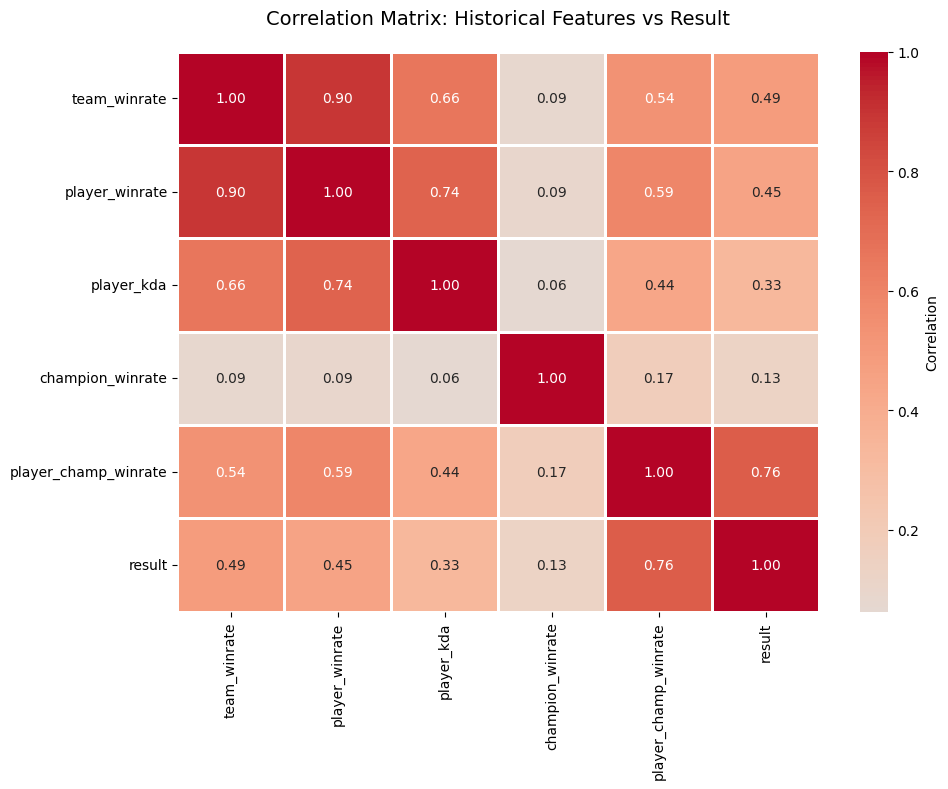


CORRELATION WITH RESULT (sorted by absolute value)
player_champ_winrate          : +0.7591
team_winrate                  : +0.4911
player_winrate                : +0.4499
player_kda                    : +0.3310
champion_winrate              : +0.1316


In [89]:
correlation_cols = ['team_winrate', 'player_winrate', 'player_kda', 'champion_winrate', 'player_champ_winrate', 'result']
correlation_matrix = df_features[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix: Historical Features vs Result', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CORRELATION WITH RESULT (sorted by absolute value)")
print("="*70)
result_corr = correlation_matrix['result'].drop('result').sort_values(key=abs, ascending=False)
for feature, corr_value in result_corr.items():
    print(f"{feature:30s}: {corr_value:+.4f}")

## 6. Encode Variables & Prepare ML Features

In [ ]:
le_team = LabelEncoder()
le_player = LabelEncoder()
le_champion = LabelEncoder()
le_side = LabelEncoder()
le_position = LabelEncoder()

df_ml = df_features.copy()

df_ml['team_encoded'] = le_team.fit_transform(df_clean['teamname'])
df_ml['player_encoded'] = le_player.fit_transform(df_clean['playername'])
df_ml['champion_encoded'] = le_champion.fit_transform(df_clean['champion'])
df_ml['side_encoded'] = le_side.fit_transform(df_clean['side'])
df_ml['position_encoded'] = le_position.fit_transform(df_clean['position'])

print("="*70)
print("ENCODED VARIABLES")
print("="*70)
print(f"  - {len(le_team.classes_)} teams")
print(f"  - {len(le_player.classes_)} players")
print(f"  - {len(le_champion.classes_)} champions")
print(f"  - {len(le_side.classes_)} sides")
print(f"  - {len(le_position.classes_)} positions")

features_pregame = [
    'team_encoded', 'player_encoded', 'champion_encoded', 'side_encoded', 'position_encoded',
    'team_winrate', 'player_winrate', 'player_kda', 'champion_winrate', 'player_champ_winrate'
]

X = df_ml[features_pregame]
y = df_ml['result']

ENCODED VARIABLES
  - 253 teams
  - 1305 players
  - 147 champions
  - 2 sides
  - 6 positions

✓ Pre-game features selected: 10
✓ Total samples: 12276

Class distribution:
result
0    0.5
1    0.5
Name: proportion, dtype: float64

✓ Pre-game features selected: 10
✓ Total samples: 12276

Class distribution:
result
0    0.5
1    0.5
Name: proportion, dtype: float64


## 7. Train/Test Split & Train Model

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

modelo = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)
y_proba_test = modelo.predict_proba(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("\n" + "="*70)
print("PRE-GAME MODEL RESULTS")
print("="*70)
print(f"Train Accuracy: {acc_train:.2%}")
print(f"Test Accuracy: {acc_test:.2%}")

print("\n" + "="*70)
print("PROBABILITY DISTRIBUTION")
print("="*70)
print(f"Min victory prob: {y_proba_test[:, 1].min():.2%}")
print(f"Max victory prob: {y_proba_test[:, 1].max():.2%}")
print(f"Mean victory prob: {y_proba_test[:, 1].mean():.2%}")
print(f"Std victory prob: {y_proba_test[:, 1].std():.4f}")

print("\n" + "="*70)
print("PREDICTION EXAMPLES:")
print("="*70)
for i in range(10):
    prob_vic = y_proba_test[i][1] * 100
    prob_def = y_proba_test[i][0] * 100
    actual = "Victory" if y_test.iloc[i] == 1 else "Defeat"
    pred = "Victory" if y_pred_test[i] == 1 else "Defeat"
    print(f"Actual: {actual:8} | Pred: {pred:8} | Defeat: {prob_def:5.1f}% | Victory: {prob_vic:5.1f}%")

Train: (9820, 10)
Test: (2456, 10)

PRE-GAME MODEL RESULTS
Train Accuracy: 90.10%
Test Accuracy: 76.38%

PROBABILITY DISTRIBUTION
Min victory prob: 0.00%
Max victory prob: 100.00%
Mean victory prob: 49.55%
Std victory prob: 0.3996

PREDICTION EXAMPLES:
Actual: Defeat   | Pred: Defeat   | Defeat: 100.0% | Victory:   0.0%
Actual: Defeat   | Pred: Defeat   | Defeat:  99.5% | Victory:   0.5%
Actual: Victory  | Pred: Victory  | Defeat:  17.7% | Victory:  82.3%
Actual: Defeat   | Pred: Victory  | Defeat:  25.1% | Victory:  74.9%
Actual: Victory  | Pred: Victory  | Defeat:   0.3% | Victory:  99.7%
Actual: Victory  | Pred: Victory  | Defeat:   4.6% | Victory:  95.4%
Actual: Victory  | Pred: Victory  | Defeat:  49.5% | Victory:  50.5%
Actual: Defeat   | Pred: Defeat   | Defeat:  75.7% | Victory:  24.3%
Actual: Defeat   | Pred: Defeat   | Defeat:  89.5% | Victory:  10.5%
Actual: Defeat   | Pred: Defeat   | Defeat:  77.8% | Victory:  22.2%

PRE-GAME MODEL RESULTS
Train Accuracy: 90.10%
Test Accur

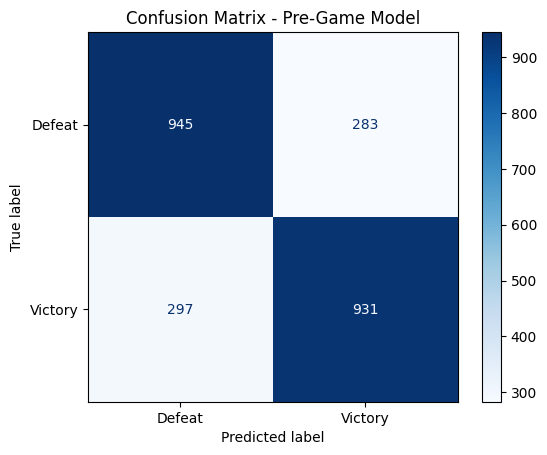


Classification Report:
              precision    recall  f1-score   support

      Defeat       0.76      0.77      0.77      1228
     Victory       0.77      0.76      0.76      1228

    accuracy                           0.76      2456
   macro avg       0.76      0.76      0.76      2456
weighted avg       0.76      0.76      0.76      2456



In [92]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Defeat', 'Victory'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Pre-Game Model')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Defeat', 'Victory']))

## 8. Pre-Game Prediction Function

In [93]:
def predict_team_match(team1_name, team1_players, team2_name, team2_players, side1='Blue', side2='Red'):
    """
    Predict match outcome for a full team (5 players) vs another team (5 players)
    
    Parameters:
    - team1_name: Name of team 1
    - team1_players: List of 5 dicts with keys: 'player', 'champion', 'position'
    - team2_name: Name of team 2
    - team2_players: List of 5 dicts with keys: 'player', 'champion', 'position'
    - side1: Side for team 1 (default 'Blue')
    - side2: Side for team 2 (default 'Red')
    
    Returns: Dictionary with predictions for both teams
    """
    
    def get_team_prediction(team_name, players, side):
        team_predictions = []
        
        for player_data in players:
            player_name = player_data['player']
            champion = player_data['champion']
            position = player_data['position']
            
            team_wr = team_stats[team_stats['teamname'] == team_name]['team_winrate'].values
            team_wr = team_wr[0] if len(team_wr) > 0 else 0.5
            
            player_info = player_stats[player_stats['playername'] == player_name]
            player_wr = player_info['player_winrate'].values[0] if len(player_info) > 0 else 0.5
            player_kda_val = player_info['player_kda'].values[0] if len(player_info) > 0 else 3.0
            
            champ_wr = champion_stats[champion_stats['champion'] == champion]['champion_winrate'].values
            champ_wr = champ_wr[0] if len(champ_wr) > 0 else 0.5
            
            pc_info = player_champion_stats[(player_champion_stats['playername'] == player_name) & 
                                            (player_champion_stats['champion'] == champion)]
            pc_wr = pc_info['player_champ_winrate'].values[0] if len(pc_info) > 0 else 0.5
            
            try:
                team_enc = le_team.transform([team_name])[0]
                player_enc = le_player.transform([player_name])[0]
                champ_enc = le_champion.transform([champion])[0]
                side_enc = le_side.transform([side])[0]
                pos_enc = le_position.transform([position])[0]
            except:
                continue
            
            X_new = pd.DataFrame([{
                'team_encoded': team_enc,
                'player_encoded': player_enc,
                'champion_encoded': champ_enc,
                'side_encoded': side_enc,
                'position_encoded': pos_enc,
                'team_winrate': team_wr,
                'player_winrate': player_wr,
                'player_kda': player_kda_val,
                'champion_winrate': champ_wr,
                'player_champ_winrate': pc_wr
            }])
            
            prob = modelo.predict_proba(X_new)[0]
            team_predictions.append({
                'player': player_name,
                'champion': champion,
                'position': position,
                'victory_prob': prob[1],
                'team_wr': team_wr,
                'player_wr': player_wr,
                'player_kda': player_kda_val,
                'champ_wr': champ_wr,
                'pc_wr': pc_wr
            })
        
        if len(team_predictions) == 0:
            return None
            
        avg_victory_prob = np.mean([p['victory_prob'] for p in team_predictions])
        
        return {
            'team_name': team_name,
            'side': side,
            'players': team_predictions,
            'raw_victory_prob': avg_victory_prob
        }
    
    team1_result = get_team_prediction(team1_name, team1_players, side1)
    team2_result = get_team_prediction(team2_name, team2_players, side2)
    
    if team1_result is None or team2_result is None:
        return None
    
    # Normalize probabilities so they sum to 100%
    total_prob = team1_result['raw_victory_prob'] + team2_result['raw_victory_prob']
    
    team1_normalized = (team1_result['raw_victory_prob'] / total_prob) * 100
    team2_normalized = (team2_result['raw_victory_prob'] / total_prob) * 100
    
    team1_result['victory_prob'] = team1_normalized
    team1_result['defeat_prob'] = team2_normalized
    
    team2_result['victory_prob'] = team2_normalized
    team2_result['defeat_prob'] = team1_normalized
    
    return {
        'team1': team1_result,
        'team2': team2_result
    }

In [ ]:
# Extract the exact rosters from the G2 vs MAD Lions match
g2_roster = [
    {'player': 'BrokenBlade', 'champion': "K'Sante", 'position': 'top'},
    {'player': 'Yike', 'champion': 'Vi', 'position': 'jng'},
    {'player': 'Caps', 'champion': 'Azir', 'position': 'mid'},
    {'player': 'Hans Sama', 'champion': 'Varus', 'position': 'bot'},
    {'player': 'Mikyx', 'champion': 'Zyra', 'position': 'sup'}
]

mad_roster = [
    {'player': 'Myrwn', 'champion': 'Gwen', 'position': 'top'},
    {'player': 'Elyoya', 'champion': 'Viego', 'position': 'jng'},
    {'player': 'Fresskowy', 'champion': 'Neeko', 'position': 'mid'},
    {'player': 'Supa', 'champion': 'Ashe', 'position': 'bot'},
    {'player': 'Alvaro', 'champion': 'Renata Glasc', 'position': 'sup'}
]

# Make prediction
prediction = predict_team_match('G2 Esports', g2_roster, 'MAD Lions KOI', mad_roster)

if prediction:
    print(f"\n{'='*70}")
    print(f"PRE-GAME PREDICTION: G2 ESPORTS vs MAD LIONS KOI")
    print(f"Game ID: LOLTMNT05_13119")
    print(f"{'='*70}\n")
    
    print(f"G2 ESPORTS ({prediction['team1']['side']} side)")
    print(f"-" * 70)
    for p in prediction['team1']['players']:
        print(f"{p['position']:8s} {p['player']:20s} {p['champion']:15s} Win: {p['victory_prob']*100:.1f}%")
    print(f"\nTeam Victory Probability: {prediction['team1']['victory_prob']:.1f}%\n")
    
    print(f"MAD LIONS KOI ({prediction['team2']['side']} side)")
    print(f"-" * 70)
    for p in prediction['team2']['players']:
        print(f"{p['position']:8s} {p['player']:20s} {p['champion']:15s} Win: {p['victory_prob']*100:.1f}%")
    print(f"\nTeam Victory Probability: {prediction['team2']['victory_prob']:.1f}%\n")
    
    print(f"{'='*70}")
    predicted_winner = "G2 ESPORTS" if prediction['team1']['victory_prob'] > prediction['team2']['victory_prob'] else "MAD LIONS KOI"
    print(f"MODEL PREDICTION: {predicted_winner} ({max(prediction['team1']['victory_prob'], prediction['team2']['victory_prob']):.1f}%)")
    print(f"ACTUAL WINNER:    G2 Esports")

else:
    print("Could not make prediction")


PRE-GAME PREDICTION: G2 ESPORTS vs T1
Game ID: LOLTMNT05_13119

G2 ESPORTS (Blue side)
----------------------------------------------------------------------
top      BrokenBlade          K'Sante         Win: 100.0%
jng      Yike                 Vi              Win: 96.3%
mid      Caps                 Azir            Win: 93.4%
bot      Hans Sama            Varus           Win: 99.9%
sup      Mikyx                Zyra            Win: 98.6%

Team Victory Probability: 73.5%

MAD LIONS KOI (Red side)
----------------------------------------------------------------------
top      Myrwn                Gwen            Win: 56.8%
jng      Elyoya               Viego           Win: 39.8%
mid      Fresskowy            Neeko           Win: 28.1%
bot      Supa                 Ashe            Win: 3.5%
sup      Alvaro               Renata Glasc    Win: 48.2%

Team Victory Probability: 26.5%

MODEL PREDICTION: G2 ESPORTS (73.5%)
ACTUAL WINNER:    G2 Esports
